In [3]:
import os
import sys
import matplotlib.pyplot as plt
import random
import torch
import torch.utils.data as data
import torch.nn as nn
import numpy as np
import pandas as pd

if os.path.abspath('..') not in sys.path:
    sys.path.insert(0, os.path.abspath('..'))

if os.path.abspath('../..') not in sys.path:
    sys.path.insert(0, os.path.abspath('../..'))
from Evaluate.evaluate import *

from utils.processing import crop
from utils.heatmap_generator import HeatmapGenerator
from NetworkTrainer.network_trainer import *
from DataLoader.dataloader_IVDsegmentation import landmark_extractor


In [2]:
path = 'C:/Users/MingHao/Downloads/Prediction-20210817T035625Z-001/Prediction/Case198/pred_IVDheatmap.nii.gz'
image = sitk.ReadImage(path , sitk.sitkFloat32)
image = sitk.GetArrayFromImage(image)[np.newaxis, :, :, :]
index = 0
for lable in range(1,20):
        check = np.where(image == lable)
        if len(check[0]) > 1:
            index = index + 1
index

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "C:/Users/MingHao/Downloads/Prediction-20210817T035625Z-001/Prediction/Case198/pred_IVDheatmap.nii.gz" does not exist.

In [114]:
MRfile_path = 'G:/SpineSegmentation/Spine_Segmentation/Spine_Segmentation/Case5/MR_512.nii.gz'
MR = sitk.ReadImage(MRfile_path , sitk.sitkFloat32)
MR = sitk.GetArrayFromImage(MR)[np.newaxis, :, :, :]
MR = np.clip(MR / 2048, a_min=0, a_max=1)

In [115]:
MR.shape


(1, 12, 512, 512)

In [116]:
landmarkfile_path = 'G:/SpineSegmentation/Spine_Segmentation/Spine_Segmentation/Case5/landmarks_512.csv'
landmarks = pd.read_csv(landmarkfile_path)
landmarks = landmark_extractor(landmarks)
list_landmarks = landmarks


In [117]:
_,D, H, W = MR.shape
heatmap_generator = HeatmapGenerator(image_size=(D, H, W),  # (12, 512, 512)
                                     sigma=3.,
                                     spine_heatmap_sigma=10,  # 20
                                     scale_factor=3.,
                                     spine_heatmap_scale_factor=20,
                                     normalize=True,
                                     size_sigma_factor=16,  # 8
                                     sigma_scale_factor=4,)

In [118]:
#for index, landmark in enumerate(list_IVD_landmarks):
    #index
    #pred_Mask += np.where(Mask == index + 2 , 1, 0)
temp = torch.zeros(1, 12, 256, 256)
index = random.randint(0, 18)
while True in np.isnan(list_landmarks[index]):
    index = random.randint(0, 18)
heatmap = heatmap_generator.generate_heatmap(landmark=list_landmarks[index])
index

12

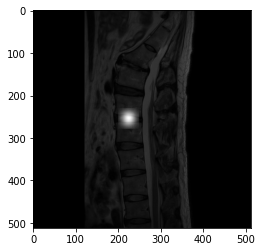

In [119]:
plt.imshow(heatmap[6] + MR[0][6], cmap='gray')


In [111]:
dataset =  [MR, heatmap]
loader = data.DataLoader(dataset=dataset, batch_size=2, shuffle=True, num_workers=4,
                             pin_memory=True)
for batch_idx, case in tqdm(enumerate(loader)):
    input_ = case[0]  # tensor: (batch_size, C, D, H, W)
    target = case[1:]

0it [00:00, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "g:\python\lib\site-packages\torch\utils\data\_utils\worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "g:\python\lib\site-packages\torch\utils\data\_utils\fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "g:\python\lib\site-packages\torch\utils\data\_utils\collate.py", line 64, in default_collate
    return default_collate([torch.as_tensor(b) for b in batch])
  File "g:\python\lib\site-packages\torch\utils\data\_utils\collate.py", line 56, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [1, 12, 512, 512] at entry 0 and [12, 512, 512] at entry 1


In [ ]:
input_.shape

In [ ]:
target.shape